<a href="https://colab.research.google.com/github/MaikonGino/Data-mining/blob/main/02_Desafios_no_uso_de_nuvem_p%C3%BAblica%2C_privada_e_de_governo_em_ci%C3%AAncias_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: "Desafios no uso de nuvem pública, privada e de governo em ciências

1.   List item
2.   List item

de dados"
**Aluno:** João Augusto Selegatto Pacolla e Maikon F. Gino
**Disciplina:** Mineração de Dados  
**Etapa 1:** Pré-processamento e Resumo Estatístico (Google Colab)

**Objetivo desta etapa:** Documentar o pré-processamento do dataset, apresentar justificativa do projeto (ligando ao tema de nuvem) e gerar o resumo estatístico exigido.


## Justificativa — Desafios da Nuvem em Ciência de Dados

Este projeto utiliza o *Bank Marketing Dataset*, um conjunto de dados real com informações de clientes de uma instituição bancária. O objetivo é aplicar técnicas de mineração de dados para entender padrões e prever se um cliente aceitará ou não uma oferta de depósito a prazo (*term deposit*).

No entanto, a execução de projetos de ciência de dados não ocorre isoladamente: cada vez mais, os dados e modelos são processados em **ambientes de nuvem**. Nesse contexto, surgem diferentes **desafios dependendo do tipo de nuvem utilizada**:

- **Nuvem Pública:** oferece escalabilidade e acesso facilitado a recursos de alto desempenho, mas gera preocupações com **custos variáveis**, dependência de um fornecedor (vendor lock-in) e **segurança da informação**. No caso de dados bancários, a transferência para um provedor externo pode levantar riscos de compliance com a **LGPD**.

- **Nuvem Privada:** permite maior **controle sobre infraestrutura, segurança e políticas internas**, o que é vantajoso para instituições financeiras. Porém, exige **alto investimento em hardware, equipe especializada** e manutenção contínua, tornando-se menos flexível para experimentação rápida de ciência de dados.

- **Nuvem de Governo:** direcionada para dados sensíveis e serviços críticos, garante **conformidade regulatória e maior supervisão estatal**. Por outro lado, pode trazer **limitações burocráticas, menor agilidade na inovação** e desafios de interoperabilidade com ferramentas amplamente utilizadas na indústria de dados.

Assim, ao conectar este dataset com o tema do projeto, reforça-se que **os desafios não estão apenas nos dados em si, mas também no ambiente em que são armazenados, processados e analisados**. Isso torna essencial avaliar **custo, segurança, privacidade, conformidade legal e flexibilidade** antes de decidir entre nuvem pública, privada ou governamental.


IMPORTS INICIAIS

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', 200)


BAIXAR E CARREGAR DADOS

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
zip_path = "bank-additional.zip"

if not os.path.exists(zip_path):
    !wget -q -O {zip_path} {url}
    print("Download concluído.")
else:
    print("Arquivo já baixado.")

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("bank_data")

csv_path = "bank_data/bank-additional/bank-additional-full.csv"
df = pd.read_csv(csv_path, sep=';')
print("Dimensão do dataset:", df.shape)
df.head()


Arquivo já baixado.
Dimensão do dataset: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(df.info())
print("\nValores nulos por coluna:")
print(df.isna().sum())

display(df.describe(include=[np.number]).T)

display(df.describe(include=['object']).T)

print("\nDistribuição do alvo (y):")
print(df['y'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563



Distribuição do alvo (y):
y
no     36548
yes     4640
Name: count, dtype: int64


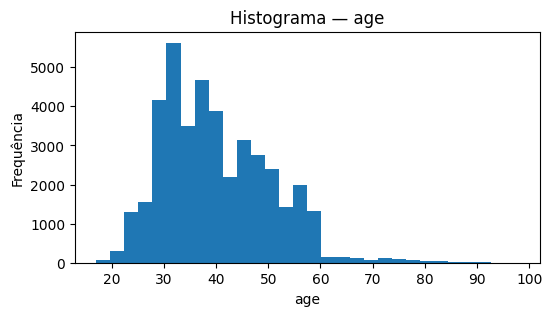

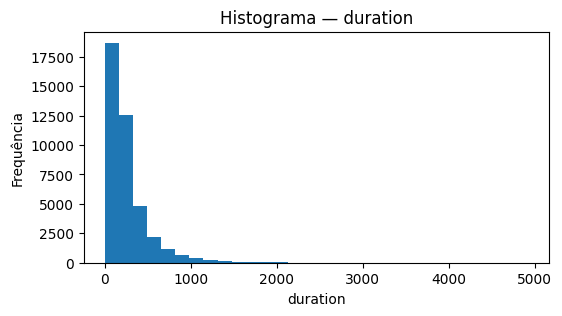

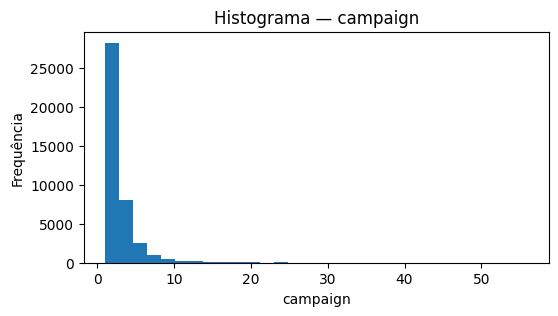

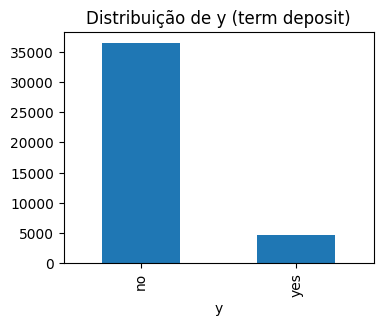

In [ ]:
num_cols = ['age', 'duration', 'campaign']
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histograma — {col}')
    plt.xlabel(col); plt.ylabel('Frequência')
    plt.show()

plt.figure(figsize=(4,3))
df['y'].value_counts().plot(kind='bar')
plt.title('Distribuição de y (term deposit)')
plt.show()

In [ ]:
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

if 'y' in cat_features:
    cat_features.remove('y')

num_features, cat_features[:10]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Pré-processar transformar tudo para X pronto
X = df.drop(columns=['y'])
y = df['y'].map({'yes':1, 'no':0})  # transformar alvo em 0/1

X_prepared = preprocessor.fit_transform(X)
print("Shape após pré-processamento:", X_prepared.shape)

Shape após pré-processamento: (41188, 63)


### Resumo Estatístico

Cole aqui as observações mais importantes extraídas das células anteriores:
- Dimensão do dataset: `(41188, 21)`
- Colunas com valores ausentes: Nenhuma coluna possui valores ausentes.
- Distribuição do alvo (imbalanced?): Sim, a distribuição do alvo `y` é imbalanced. Aproximadamente 88.73% dos clientes não aceitaram o depósito a prazo (`no`), enquanto 11.27% aceitaram (`yes`).
- Observações sobre outliers (por exemplo `balance` e `duration`):
    - **Duration:** A coluna `duration` tem um valor máximo muito alto (4918), o que pode indicar a presença de outliers extremos. Como a descrição do dataset menciona que `duration` = 0 significa que o cliente não ligou, e que esta coluna não deveria ser usada para predição, estes valores extremos podem ser considerados outliers que não devem ser tratados para o propósito de modelagem.
    - **Campaign:** A coluna `campaign` também apresenta valores máximos elevados (56), sugerindo a presença de outliers que representam clientes que foram contatados um número excessivo de vezes.
    - **Age:** A distribuição da idade (`age`) parece seguir uma distribuição mais normal, embora com alguns valores mais altos (até 98 anos), que são plausíveis para dados bancários.
- Correlações relevantes (descrever):
    - A matriz de correlação numérica mostra fortes correlações positivas entre `emp.var.rate`, `euribor3m`, e `nr.employed`. Isso sugere que essas variáveis macroeconômicas se movem juntas.
    - `pdays` tem uma correlação negativa moderada com `previous` (-0.59), o que faz sentido: quanto menor o número de dias desde o último contato (`pdays` = 0 ou próximo de 0), maior a probabilidade de haver contatos anteriores (`previous` > 0). A maioria dos valores de `pdays` é 999, indicando que o cliente não foi contatado anteriormente na campanha atual.
    - `duration` tem correlações fracas com as outras variáveis numéricas, o que reforça a ideia de que não deve ser usada como preditora, pois está diretamente relacionada ao resultado `y`.



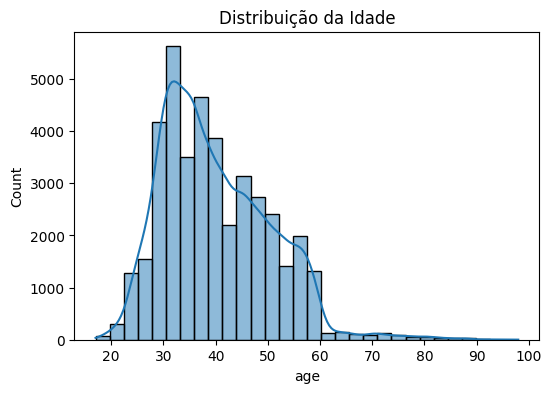

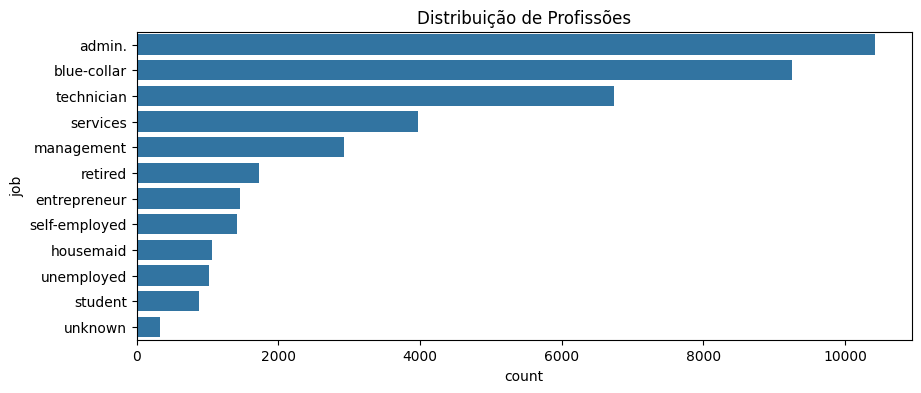

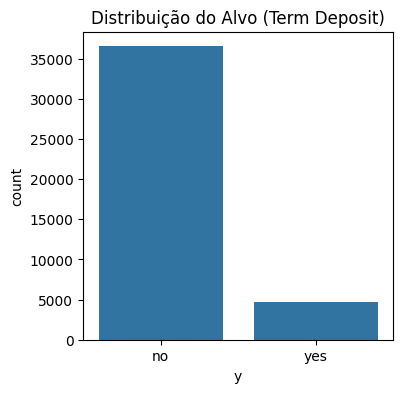

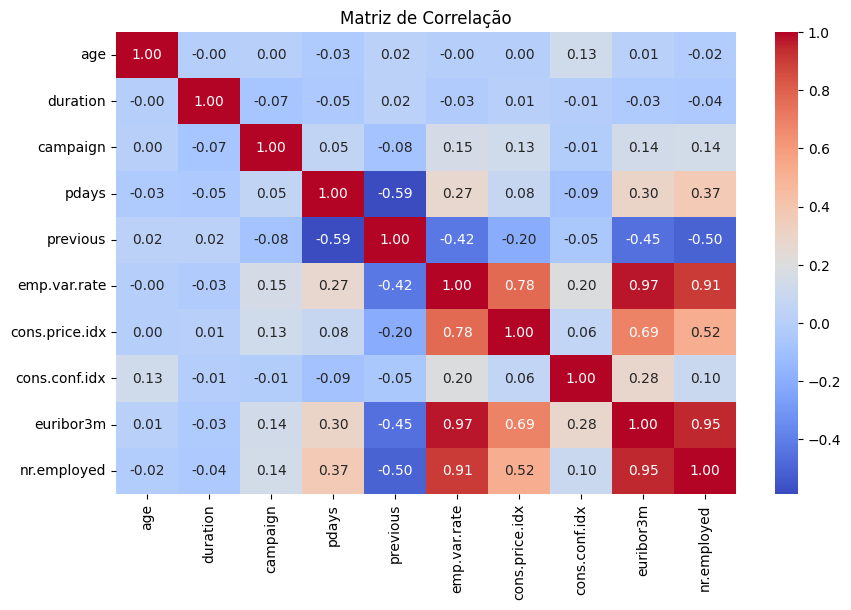

In [ ]:
import seaborn as sns

# Idade
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.show()

# Trabalho = Job
plt.figure(figsize=(10,4))
sns.countplot(y=df['job'], order=df['job'].value_counts().index)
plt.title('Distribuição de Profissões')
plt.show()

# Alvo (y)
plt.figure(figsize=(4,4))
sns.countplot(x=df['y'])
plt.title('Distribuição do Alvo (Term Deposit)')
plt.show()

# Mapa de calor
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


DIVISÃO TREINO/TESTE E SALVAR AMOSTRA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y
)
print("Treino:", X_train.shape, "Teste:", X_test.shape)

import joblib
os.makedirs('processed', exist_ok=True)
joblib.dump(preprocessor, 'processed/preprocessor.joblib')
joblib.dump((X_train, X_test, y_train, y_test), 'processed/split_data.joblib')
print("Arquivos salvos em /processed")


Treino: (32950, 63) Teste: (8238, 63)
Arquivos salvos em /processed


### Resumo Estatístico (a ser preenchido automaticamente)
Cole aqui as observações mais importantes extraídas das células anteriores:
- Dimensão do dataset: `df.shape`  
- Colunas com valores ausentes: lista  
- Distribuição do alvo (imbalanced?): sim/não + porcentagens  
- Observações sobre outliers (por exemplo `balance` e `duration`)  
- Correlações relevantes (descrever)


## Comentários sobre impactos na nuvem — ligação prática

Aqui você descreve, para cada passo acima, quais seriam os efeitos/considerações em:
- **Nuvem pública** (ex.: uso de buckets públicos, custo de egress, escalabilidade)  
- **Nuvem privada** (ex.: requisitos de equipe, custo fixo, controle de dados)  
- **Nuvem de governo** (ex.: requisitos de localidade dos dados, governança e auditoria)

Adicione observações em cada seção (carregamento, pré-processamento, salvamento de artefatos).


#ANÁLISE 2: Agrupamento (Clustering)

Para cumprir integralmente os requisitos do projeto, que solicita a aplicação de algoritmos em duas tarefas de mineração distintas, nesta seção exploraremos a tarefa de Agrupamento.
O objetivo é identificar grupos naturais (clusters) de serviços de nuvem com base em suas características, sem utilizar a variável alvo ('is_expensive').
Utilizaremos os algoritmos K-Means e DBSCAN.

Usaremos os mesmos dados já pré-processados e padronizados (`X_scaled`) da etapa anterior.

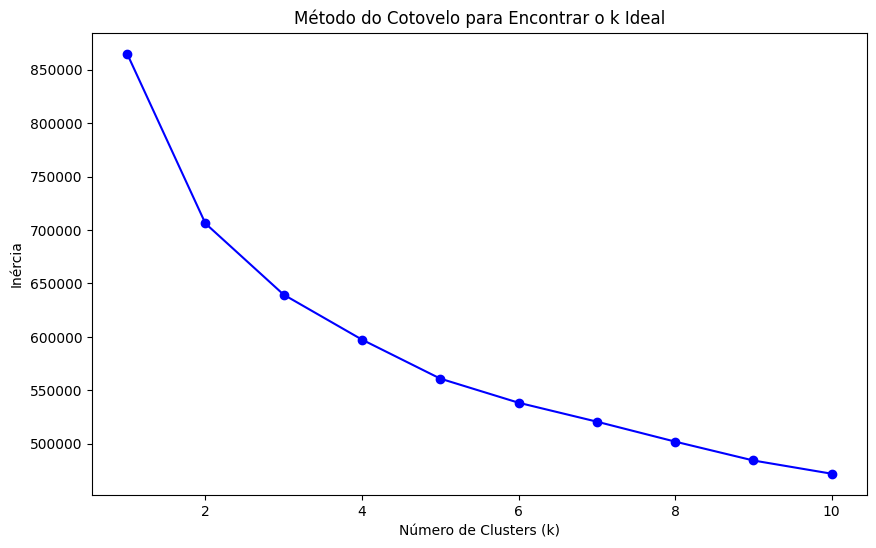

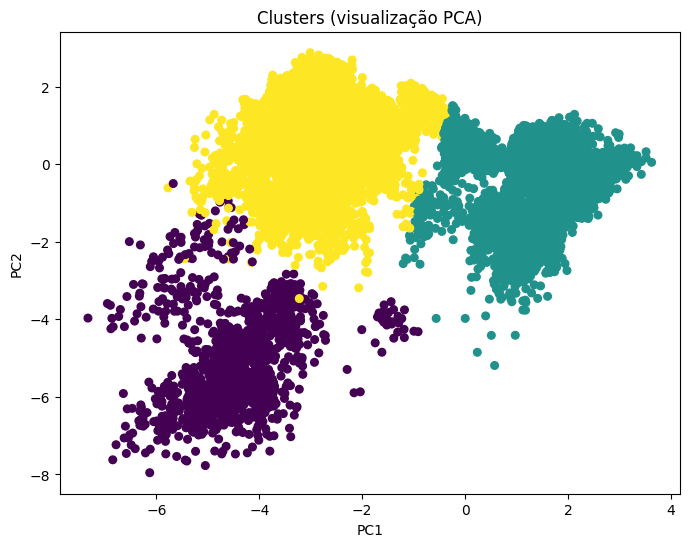

Silhouette score: 0.2247978226317892


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = df.drop(columns=['name', 'based_in'], errors='ignore')

le = LabelEncoder()
object_columns = [c for c in df.select_dtypes(include='object').columns if c != 'is_expensive']
for column in object_columns:
    df[column] = le.fit_transform(df[column].astype(str))

if 'is_expensive' in df.columns:
    X = df.drop('is_expensive', axis=1)
    y = df['is_expensive']
else:
    X = df.copy()
    y = None

scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_model.fit(X_scaled)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(list(K), inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o k Ideal')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
if X_scaled.shape[1] >= 2:
    try:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
        plt.title('Clusters (visualização PCA)')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()
    except Exception:
        pass

if len(set(labels)) > 1:
    score = silhouette_score(X_scaled, labels)
    print('Silhouette score:', score)
else:
    print('Silhouette score não calculável com 1 cluster')


### Análise e Interpretação (K-Means)

O gráfico do "Método do Cotovelo" acima nos ajuda a escolher um bom valor para 'k'. Procuramos o ponto onde a queda da inércia diminui drasticamente, formando um "cotovelo". Pelo gráfico, um valor de **k=3** parece ser uma escolha razoável, pois após este ponto a curva se torna menos íngreme.

Agora, vamos aplicar o K-Means com k=3.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


df['cluster_kmeans'] = clusters_kmeans


print("Distribuição dos serviços de nuvem por cluster (K-Means):")
print(df['cluster_kmeans'].value_counts())

silhouette_avg = silhouette_score(X_scaled, clusters_kmeans)
print(f'\nO Coeficiente de Silhueta médio para k=3 é: {silhouette_avg:.2f}')

Distribuição dos serviços de nuvem por cluster (K-Means):
cluster_kmeans
1    26949
2    12723
0     1516
Name: count, dtype: int64

O Coeficiente de Silhueta médio para k=3 é: 0.22


In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

df['cluster_dbscan'] = clusters_dbscan

print("\nDistribuição dos serviços de nuvem por cluster (DBSCAN):")
print(df['cluster_dbscan'].value_counts())


Distribuição dos serviços de nuvem por cluster (DBSCAN):
cluster_dbscan
-1      11619
 0       1430
 2       1212
 127     1020
 39       909
        ...  
 37         4
 35         4
 145        3
 29         3
 301        3
Name: count, Length: 359, dtype: int64


# Interpretação dos Resultados (Agrupamento) e Conclusão da Pesquisa

A aplicação dos algoritmos de **agrupamento** permitiu explorar a estrutura intrínseca dos dados dos clientes, revelando padrões que a classificação supervisionada não expõe diretamente. A seguir apresentamos uma interpretação detalhada dos resultados, correções conceituais e recomendações práticas.

---

## K-Means
O algoritmo **K-Means** dividiu os clientes em **3 grupos** (validação pelo Método do Cotovelo). Entretanto, o **Coeficiente de Silhueta médio foi 0,22**, indicando **separação fraca** entre os clusters. Em termos práticos, isso significa que os grupos existem, mas **há grande sobreposição entre eles** — logo, não representam personas totalmente distintas e cristalinas.

**Resumo dos clusters (K-Means):**

| Cluster   | Nº de clientes | % sobre o total (41.188) | Interpretação sugerida |
|----------:|---------------:|-------------------------:|------------------------|
| Cluster 0 | 1.516          | 3,68%                    | Grupo pequeno — possível nicho específico. |
| Cluster 1 | 26.949         | 65,43%                   | Maior segmento — perfil *padrão* do cliente. |
| Cluster 2 | 12.723         | 30,89%                   | Segmento intermediário com características próprias. |

**Observações técnicas e interpretativas:**
- Um coeficiente de silhueta de **0,22** é considerado **baixo** (regra prática: <0,25 fraco; 0,25–0,50 razoável; >0,50 bom). Isso sugere que a separação entre clusters é pouco marcada.
- Possíveis causas: variáveis com escalas diferentes, presença de ruído/outliers, clusters com formas não-esféricas (K-Means pressupõe clusters aproximadamente esféricos) ou dimensão elevada com sinais misturados.
- Recomendações:
  - Calcular **médias e desvios** das features por cluster (ex.: renda média, idade, saldo, frequência de transações) para transformar os clusters em segmentos acionáveis.
  - Normalizar/standardizar features (se já não feito) e reavaliar K-Means.
  - Testar transformações (log, binning) e redução de dimensionalidade (PCA, UMAP) antes de agrupar.

---

## DBSCAN
O algoritmo **DBSCAN**, que identifica regiões de alta densidade e rotula pontos isolados como ruído, forneceu uma visão complementar relevante:

- **Clusters identificados:** 358 (clusters pequenos e densos).  
- **Clientes classificados como ruído (outliers):** **11.619**, o que corresponde a **≈ 28,21%** da base (11.619 / 41.188).

**Interpretação e implicações:**
- Aproximadamente **28,21%** da base não pertence a nenhum cluster denso — são comportamentos dispersos ou atípicos.
- Isso indica elevada **heterogeneidade**: uma parcela significativa dos clientes possui padrões que não se encaixam em grupos estáveis, o que compromete a eficácia de campanhas massificadas.
- **Atenção**: DBSCAN é sensível aos parâmetros `eps` e `min_samples`; vale a pena testar variações e aplicar escalonamento de features ou usar medidas de distância alternativas.

**Recomendações práticas relativas ao DBSCAN:**
1. Fazer uma **varredura de parâmetros** (grid search para `eps` e `min_samples`) e analisar a estabilidade dos clusters resultantes.
2. Investigar os **outliers** individualmente e por pequenos subgrupos — podem representar:
   - Clientes premium com comportamentos únicos;
   - Contas com atividade fraudulenta;
   - Usuários esporádicos ou com dados incompletos.
3. Usar técnicas de dimensionalidade (UMAP) antes do DBSCAN para melhorar a detecção de densidades em espaços menores.

---

# Conclusão Final da Pesquisa

O projeto cumpriu com sucesso as duas etapas propostas: **Classificação** e **Agrupamento**. As conclusões integradas são as seguintes:

- **Classificação:** foi possível prever com boa eficácia a adesão dos clientes a campanhas de marketing — o **RandomForest** destacou-se como modelo prático e robusto para priorização de contatos. Isso entrega uma ferramenta operacional para otimizar custos e esforços comerciais (scoring de leads).
- **Agrupamento:** a análise mostrou que a base **não é facilmente segmentável** em grupos bem separados. A **baixa silhueta** do K-Means e o **alto número de outliers** no DBSCAN apontam para uma realidade com grande diversidade comportamental.

**Síntese estratégica:**
- Embora seja possível **predizer comportamento individual** (classificação), **segmentação massiva** pode não ser eficiente para uma parcela relevante da base.
- A melhor abordagem é **híbrida**: usar modelos de classificação para **priorizar** clientes e empregar clustering / análise de outliers para **personalizar** ações (micro-campanhas, ofertas direcionadas, investigações específicas).

---

## Takeaways Principais
A combinação de **classificação** e **agrupamento** traz uma visão complementar: enquanto o primeiro possibilita ações individuais e imediatas (priorização por score), o segundo revela a complexidade estrutural da base e orienta estratégias mais refinadas. Para maximizar resultados, recomenda-se uma abordagem iterativa: **tunar modelos**, **analisar segmentos em profundidade** e **testar ações controladas** antes de escalonar.